# Rebalancing Frequency

Group 5, Math Methods in Financial Economics

In order to determine the appropriate frequency for rebalancing a portfolio to correct for drift, we use past porfolio performance and Monte Carlo simulation to consider different rebalancing timesteps.

## Examine Mutual Fund Data

Import fund data from Yahoo!Finance, clean, and plot.

In [11]:
#import data
import pandas as pd
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2009, 7, 1)
end = datetime.datetime(2016, 7, 1)

VEIEX = web.DataReader("VEIEX", 'yahoo', start, end) #emerging markets
VGSIX = web.DataReader("VGSIX", 'yahoo', start, end) #real estate investment trusts
VISVX = web.DataReader("VISVX", 'yahoo', start, end) #small cap value
VIVAX = web.DataReader("VIVAX", 'yahoo', start, end) #value index (large)
VIMSX = web.DataReader("VIMSX", 'yahoo', start, end) #mid cap
VIGRX = web.DataReader("VIGRX", 'yahoo', start, end) #growth index (large)
VISGX = web.DataReader("VISGX", 'yahoo', start, end) #small cap growth
VEURX = web.DataReader("VEURX", 'yahoo', start, end) #European
VPACX = web.DataReader("VPACX", 'yahoo', start, end) #Pacific
VBISX = web.DataReader("VBISX", 'yahoo', start, end) #short term government bonds

In [200]:
#concatenate data
funds = [VEIEX, VGSIX, VISVX, VIVAX, VIMSX, VIGRX, VEURX, VPACX, VBISX]
fundnames = ["VEIEX", "VGSIX", "VISVX", "VIVAX", "VIMSX", "VIGRX", "VEURX", "VPACX", "VBISX"]

for k in range(0,len(fundnames)):
    funds[k] = funds[k].drop(["Open", "High", "Low", "Close", "Volume"],1)
    funds[k] = funds[k].rename(index=str, columns={"Adj Close":fundnames[k]})

history = pd.concat(funds, axis=1)
history.index = history.index.to_datetime()

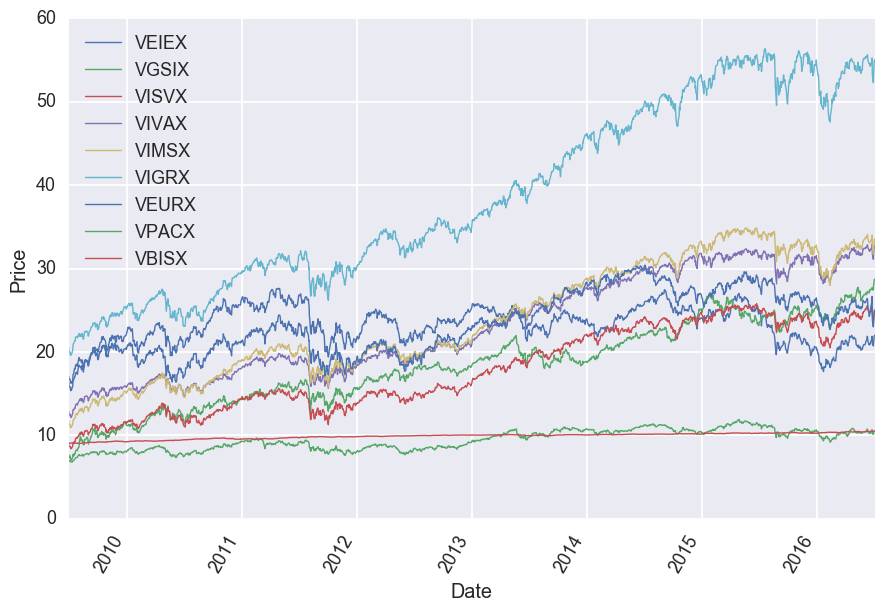

In [201]:
#plot data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context("talk", rc={"lines.linewidth": 1})
history.plot(rot=60)
plt.xlabel('Date')
plt.ylabel('Price')

## Calculate Returns and Volatility for Each Stock

In [229]:
#This section is adapted from Gouthaman Balaraman
import numpy as np

df=history[fundnames[0]]

# create a time-series of monthly data points
rsmp = df.resample('M').last()

# compute returns
rts = rsmp/rsmp.shift(1) - 1
rts = rts.dropna()
covmat = np.cov(rts)

# 5- year volatility and 1-year momentum
volatility = np.sqrt(covmat)

# annualize the numbers
prd = 12. # used monthly returns; 12 periods to annualize
volatility = volatility*np.sqrt(prd)

av_ret = rts.mean()

## Risk Aversion Calculation

Construct a utility function and calculate risk aversion $\gamma$.

In [1]:
#code

## Stock/Bond Split

Calculate $k_b$ and $k_s$ based on the individual's risk aversion.

In [ ]:
#code

## Optimal Portfolio

Find $\mu$ and $\sigma$ of the optimal portfolio

In [2]:
#code

## Rebalancing Frequency

### Historical Performance

Use past stock data to compare different rebalancing timesteps: minute, hour, day, month, year.

In [3]:
#code

### Future Performance (Monte Carlo)

Use Monte Carlo process to estimate future performance of different rebalancing timesteps: minute, hour, day, month, year.

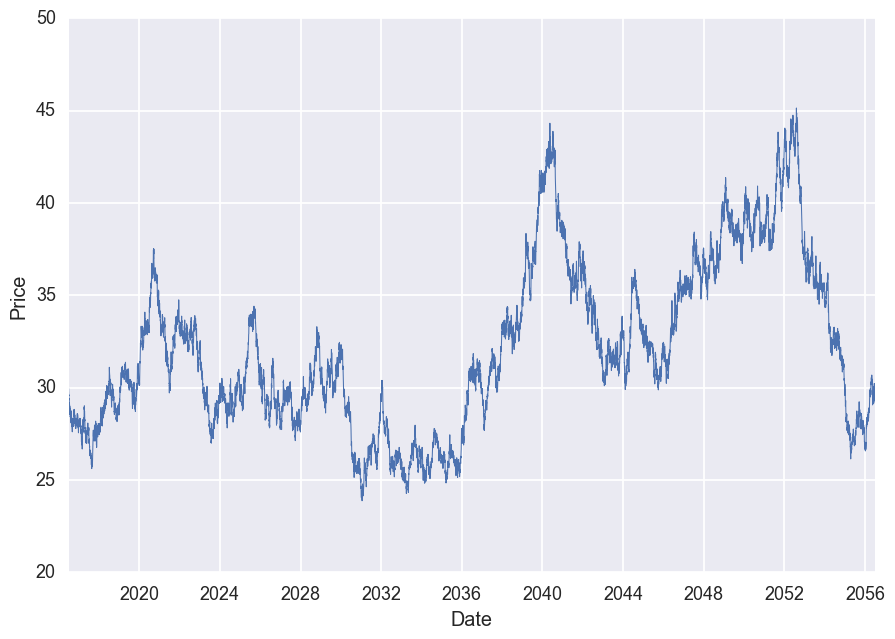

In [168]:
#this section was adapted from Jeffrey Kantor's SimPy example
import simpy 
import random

r=0.05

# geometric brownian motion
def gbm(env,name,tick,P,r,sigma):
    #P is current stock price, r is expected return, sigma is 
    t = end;
    while True:
        Plog.append(P)
        tlog.append(t)
        yield env.timeout(tick)
        P = P*np.exp((r-0.5*sigma**2)*tick)*np.exp(sigma*np.sqrt(tick)*random.normalvariate(0,1))
        if P<0:
            P=0
        t += datetime.timedelta(days=1)
        
# create the simulation environment
env = simpy.Environment()

event_length = 10
event_converter = 14600 #40 years converted to days

env.process(gbm(env, "VEIEX", event_length/event_converter, 30, r, 0.2))

# add the clock process to the environment. Set the tick interval.
#for k in range(0,len(stock_ds)):
    #env.process(gbm(env, fundnames[k], np.sqrt(1.0/252), 80, stock_ds["mu"][k], stock_ds["sigma"][k]))

# run the simulation for a fixed period of time   
Plog = []
tlog = []
env.run(until=event_length)

plt.plot(tlog,Plog)
plt.xlabel('Date')
plt.ylabel('Price')
sns.set_context("talk", rc={"lines.linewidth": 0.75})

## References

### Paper
See paper here; academic resources at end.

### Code
* [Simpy example by Jeffrey Kantor](https://github.com/jckantor/ESTM60203/blob/master/notebooks/Getting%20Started%20with%20Discrete%20Event%20Simulation.ipynb)  

* Vanguard program by Tom Cosimano

* [Calculating Stock Beta, Volatility, and More by Gouthaman Balaraman](http://gouthamanbalaraman.com/blog/calculating-stock-beta.html)